<a href="https://colab.research.google.com/github/Eric428-a/LinearRegressionProject/blob/main/Detailed_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Importing the dataset
dataset = pd.read_csv("covid_data.csv")


In [ ]:
dataset.head

<bound method NDFrame.head of             location        date  new_cases  new_deaths  population  \
0        Afghanistan  2019-12-31          0           0  38928341.0   
1        Afghanistan  2020-01-01          0           0  38928341.0   
2        Afghanistan  2020-01-02          0           0  38928341.0   
3        Afghanistan  2020-01-03          0           0  38928341.0   
4        Afghanistan  2020-01-04          0           0  38928341.0   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
0                      2.581        1803.9

In [ ]:
dataset.columns

Index(['location', 'date', 'new_cases', 'new_deaths', 'population',
       'aged_65_older_percent', 'gdp_per_capita',
       'hospital_beds_per_thousand'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
dataset.describe()

,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
count,23082.000000,23082.000000,2.301800e+04,20643.000000,20711.000000,19144.000000
mean,624.769257,35.629062,1.037003e+08,9.758570,22708.384791,3.204687
std,5517.309068,330.986941,6.716897e+08,6.445662,21187.826121,2.593700
min,-2461.000000,-1918.000000,8.090000e+02,1.144000,661.240000,0.100000
25%,0.000000,0.000000,2.083380e+06,3.853000,6426.674000,1.400000
50%,3.000000,0.000000,9.449321e+06,7.646000,15524.995000,2.600000
75%,55.000000,1.000000,3.346920e+07,15.322000,35220.084000,4.210000
max,133510.000000,10520.000000,7.794799e+09,27.049000,116935.600000,13.800000


In [ ]:
dataset.count()

location                      23082
date                          23082
new_cases                     23082
new_deaths                    23082
population                    23018
aged_65_older_percent         20643
gdp_per_capita                20711
hospital_beds_per_thousand    19144
dtype: int64

In [ ]:
dataset.describe

<bound method NDFrame.describe of             location        date  new_cases  new_deaths  population  \
0        Afghanistan  2019-12-31          0           0  38928341.0   
1        Afghanistan  2020-01-01          0           0  38928341.0   
2        Afghanistan  2020-01-02          0           0  38928341.0   
3        Afghanistan  2020-01-03          0           0  38928341.0   
4        Afghanistan  2020-01-04          0           0  38928341.0   
...              ...         ...        ...         ...         ...   
23077  International  2020-02-28          0           0         NaN   
23078  International  2020-02-29          0           2         NaN   
23079  International  2020-03-01          0           0         NaN   
23080  International  2020-03-02          0           0         NaN   
23081  International  2020-03-10         -9           1         NaN   

       aged_65_older_percent  gdp_per_capita  hospital_beds_per_thousand  
0                      2.581        18

In [ ]:
# Selecting a numeric column for simplicity (you can choose a different one)
selected_column = 'gdp_per_capita'


In [ ]:
# Extracting features (X) and target variable (y)
X = dataset[[selected_column]].values
y = dataset['new_cases'].values

In [ ]:
# Handling missing values in X
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Feature scaling (optional, but often beneficial for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Fitting simple linear regression to the training set
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
# Predicting the test set results
y_pred = regressor.predict(X_test_scaled)

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 30749718.175715514


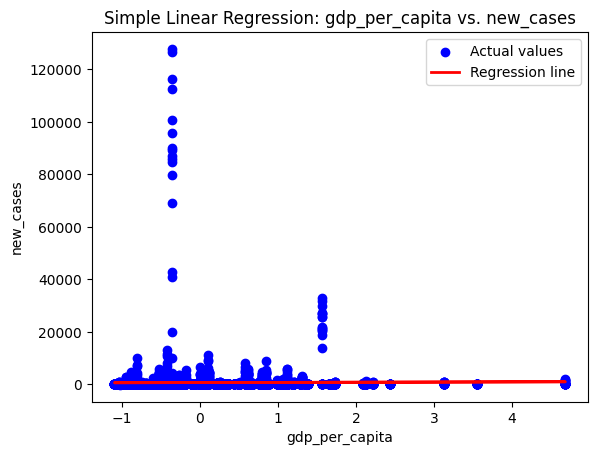

In [ ]:
# Visualizing the results
plt.scatter(X_test_scaled, y_test, color='blue', label='Actual values')
plt.plot(X_test_scaled, y_pred, color='red', linewidth=2, label='Regression line')
plt.title(f'Simple Linear Regression: {selected_column} vs. new_cases')
plt.xlabel(selected_column)
plt.ylabel('new_cases')
plt.legend()
plt.show()